In [7]:
import pandas as pd
import numpy as np


In [15]:
#reading the dataset
try:
    
    dataset=pd.read_csv("spam.csv",encoding='iso-8859-1')
except FileNotFoundError:
    print("File Not found error")
except UnicodeDecodeError as e:
    print(f'Error decoding :{e}')

In [17]:
dataset.shape

(5572, 5)

In [16]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.model building
# 5.evaluation
# 6.improvement 
# 7.website
# 8.deploy

# 1.data cleaning

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
dataset=dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]) #drop last 3 columns because it contain very less data


In [24]:
#renaming the columns
dataset.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [29]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [33]:
dataset["target"]=encoder.fit_transform(dataset['target'])

In [34]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
#checking missing value
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
#check for duplicate value
dataset.duplicated().sum()

403

In [39]:
#remove duplicate value
dataset=dataset.drop_duplicates(keep="first")

In [40]:
dataset.duplicated().sum()

0

In [42]:
# checking the shape of dataset after cleanig data
dataset.shape

(5169, 2)

# 2.EDA 

In [44]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
dataset["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [47]:
#visulazation
import matplotlib.pyplot as plt

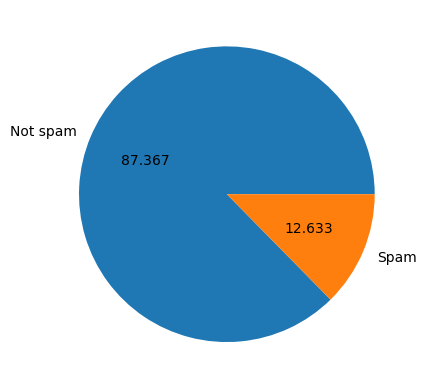

In [54]:
plt.pie(dataset["target"].value_counts(),labels=["Not spam","Spam"],autopct="%.3f")
plt.show() #to remove the extra piece of code


In [ ]:
#data is imbalance


In [57]:
dataset['num_character']=dataset["text"].apply(len)

In [58]:
dataset.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
# !pip install nltk

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
#num of words


In [69]:
dataset["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [73]:
#coputinf the numof word in any sentences


In [74]:
dataset["num_of_words"]=dataset["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [76]:
dataset.head()

,target,text,num_character,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [78]:
#NUM OF SENTENCEA
dataset["num_sen"]=dataset["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [79]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [82]:
dataset[["num_character","num_of_words","num_sen"]].describescribe()

,num_character,num_of_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [90]:
import seaborn as sns


In [91]:
#analysiis of both ham and spam message differnetly 
#for ham
dataset[dataset["target"]==0][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


<Axes: xlabel='num_character', ylabel='Count'>

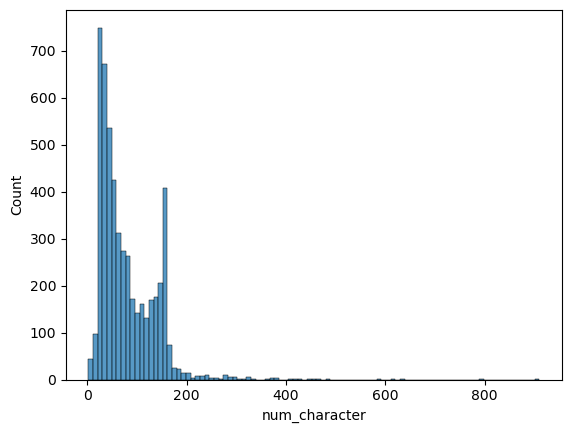

In [95]:
#for spam
dataset[dataset["target"]==1][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


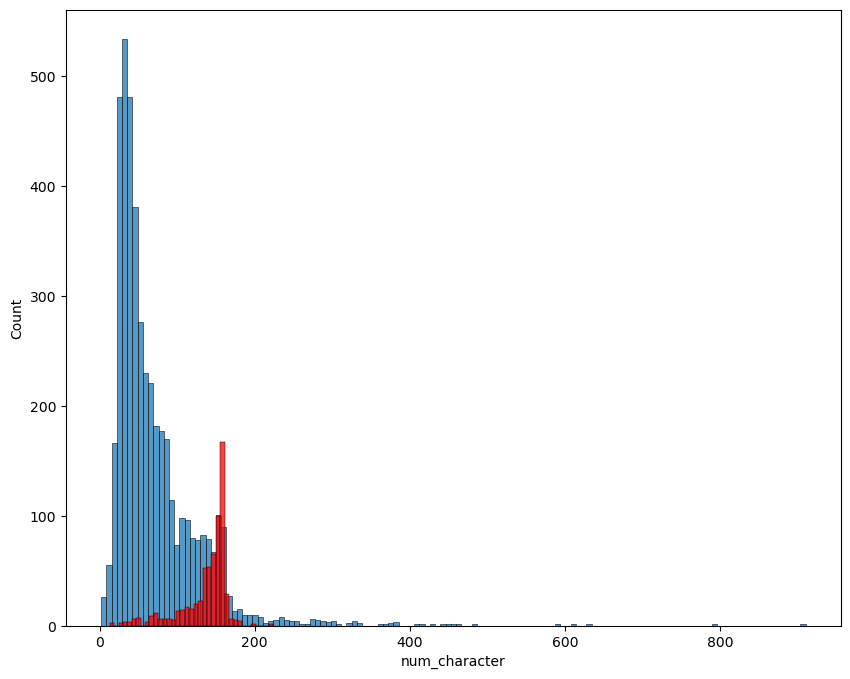

In [114]:
#visulaization
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_character"])
sns.histplot(dataset[dataset["target"]==1]["num_character"],color='red')
plt.show()

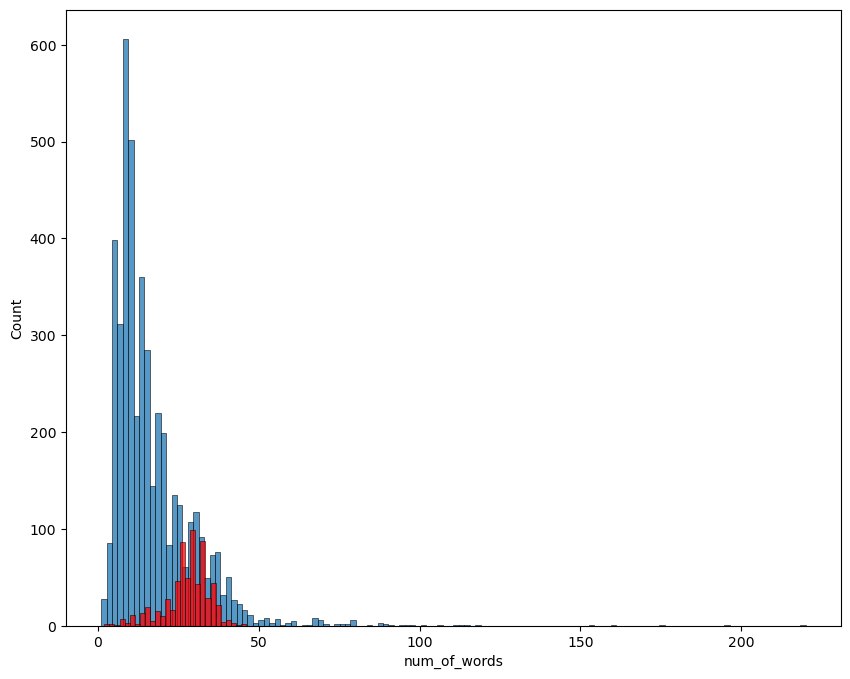

In [115]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_of_words"])
sns.histplot(dataset[dataset["target"]==1]["num_of_words"],color='red')
plt.show()

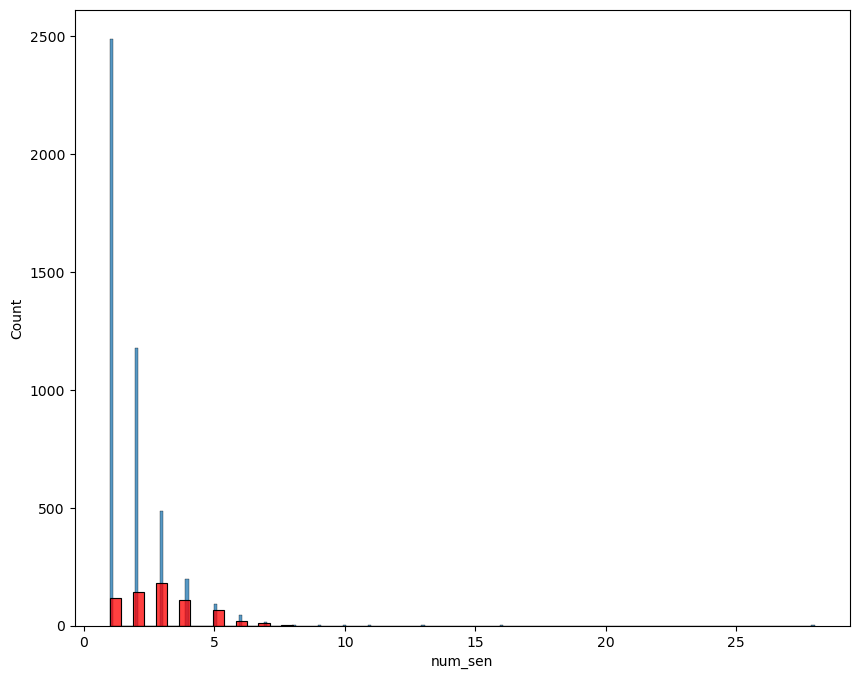

In [122]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_sen"])
sns.histplot(dataset[dataset["target"]==1]["num_sen"],color='red')
plt.show()

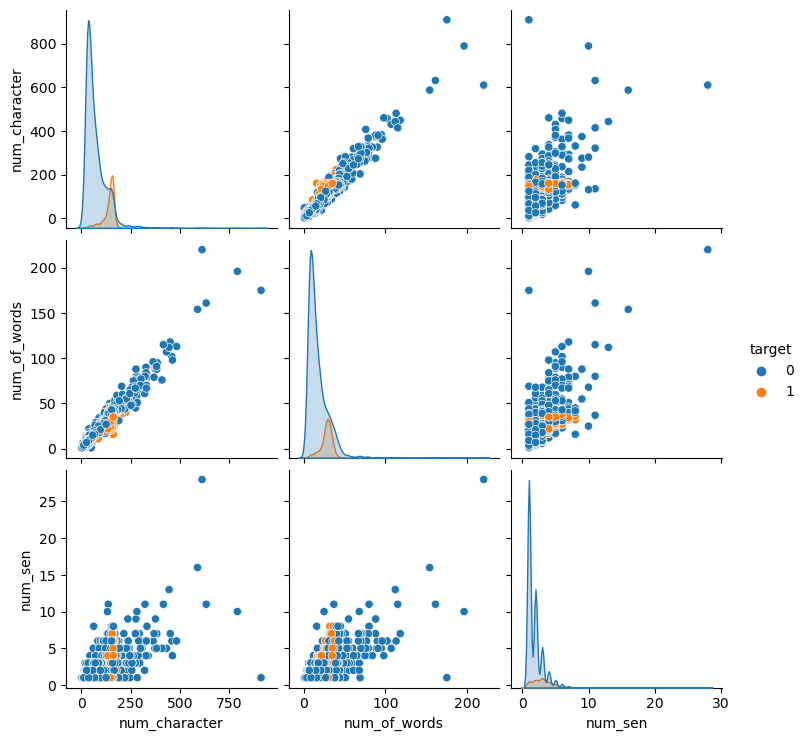

In [126]:
sns.pairplot(dataset,hue='target')

In [124]:
#getting the correlation coeffieceint
dataset.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15180\616400433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,target,num_character,num_of_words,num_sen
target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_sen,0.284901,0.638143,0.684541,1.000000


C:\Users\Acer\AppData\Local\Temp\ipykernel_15180\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

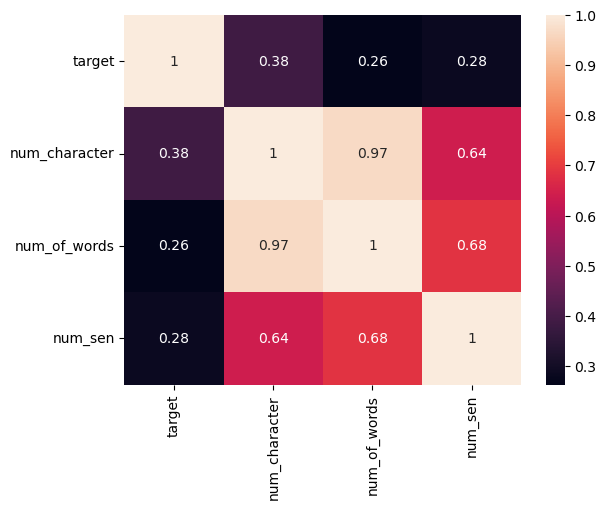

In [130]:
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
#about the stemming word
from nltk.corpus import stopwords
stopwords.words('english')

#about the punctuation
import string
string.punctuation

#about stemming of the word
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [236]:
def text_transform(text):
    text_lower=text.lower() #changing all chaarcter into lower
#     print(f'text_in_lower={text_lower}')
    
    text_break_word=nltk.word_tokenize(text_lower)#breaking all the sentence into word and store in list 
#     print(f'text_break_word={text_break_word}')
    
    #TEXT WITHOUT SPECIAL  CHARACTER
    text_without_spec_char=[]
    for i in text_break_word:
        if  i.isalnum():
            text_without_spec_char.append(i) #REMOVING THE SPECIAL CHARACTER
#     print(f'text_without_spec_char={text_without_spec_char}') 
    
    
    #REMOVING  THE stopword and punctuation
    text_without_stopword_punc=[]
    for i in text_without_spec_char:
        if i not in stopwords.words("english") and i not in string.punctuation:
            text_without_stopword_punc.append(i)
#     print(f'text_without_stopword_punc={text_without_stopword_punc}')
        
        
    #removig stemming 
    text_without_stemming=[]
    for i in text_without_stopword_punc:
        text_without_stemming.append(ps.stem(i))
        
#     print(f'text_without_stemming={text_without_stemming}') 
            
    return " ".join(text_without_stemming)

    

In [237]:
text_transform(dataset["text"][10])


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [238]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [239]:
#getting the transform column
dataset["text"].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [240]:
dataset["transformed_text"]=dataset["text"].apply(text_transform)

In [241]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
